# Maquinas de Soporte Vectorial

Sirven para problemas de clasificacion y regresion. Sin embargo, en scikit learn tiene un modulo para cada tipo de modelo!

## Beneficios

- Tienen una implementacion rapida
- Buenos resultados predictivos
- Buenos en general

# Clasificadores de Rango de Margen

Es un modelo discriminativo. O sea, que utiliza una funcion para separar los datos. Pueden haber muchas funciones distintas que separen los datos!

**Duda:** Cual es la diferencia entre generativos y discriminativos?

## Clasificados del Maximo Margen

Es el clasificador (la funcion o borde) que separa los datos, y que toca el punto mas cercano a cada uno de los grupos existentes.

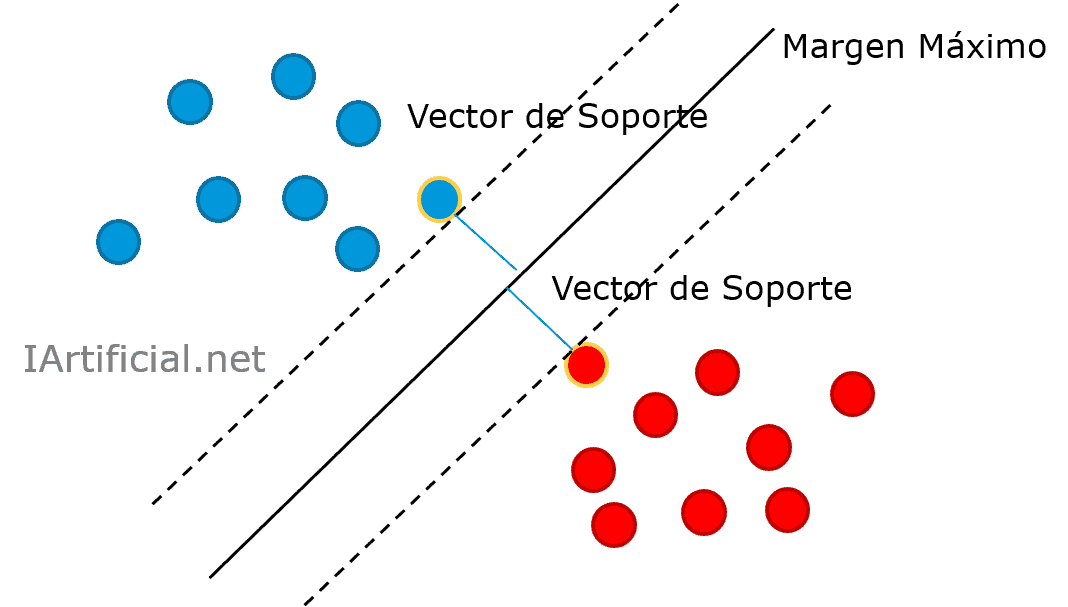

Aqui se ocupa una recta (cuando es de dos variables) o un plano (tres variables) para separar las clases!. Aqui se maximiza el margen de separacion entre los puntos de cada grupo.


## Maquinas de Soporte Vectorial

Que pasa si es que un punto de la otra case se pasa? Entonces, en ese caso, hay que definir el parametro de tolerancia!

Podemos tolerar que se nos pase algun dato en la otra clase. Esto puede permitir que se genere un rango de margen mucho mejor para clasificar los demas puntos.

## Estandarizacion de atributos

Es muy importante estandarizar los datos! Ya que el modelo depende de la escala de los datos. Por lo tanto, la discriminacion se debe hacer dentro de un rango similar de los datos.

# Pipeline

Aqui si que vimos Pipelines

```python
pipline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=3),
    ('model', LinearRegresion()))
]
)
```

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
import seaborn as sns

df = pd.read_csv('winequality-red.csv')

In [7]:
# Si los datos son floats, entonces se grafica distplot, y si es int, entonces un boxplot (porque son discretos)

In [10]:
df['quality_bin'] = np.where(df['quality'] > df['quality'].mean(), 1, 0)
df_modelo = df.drop(columns='quality')

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
X = df_modelo.drop(columns='quality_bin')
y = df_modelo['quality_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [18]:
pipeline = Pipeline(
    [
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
    ]
)

pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)
print(classification_report(y_test, y_hat))

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

Algo bueno de las pipelines, es que se puede exportar el pipeline entrenado a un archivo! Despues simplemente se pueden hacer predicciones!

# Kernelizacion

Es una forma de reexpresar nuestros datos. Esto permite que datos que NO son posibles separar por una linea/plano (pero quizas si por una peque;a curva), si lo puedan ser.

## Kernel Gaussiano

Toma los datos originales, y los reexpresa como la distancia entre los puntos y los pone en un plano. Esto permite generar un plano que si corte correctamente los datos!

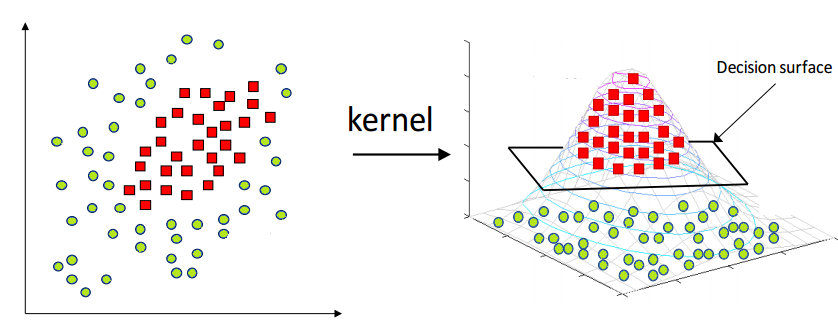

Lo bueno de estos kernels, es que se puede aplicar a la matriz completa, y el calculo es mucho menos intensivo!

# Implementacion

In [23]:
pipeline_rbf = Pipeline(
    [
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
    ]
)

pipeline_rbf.fit(X_train, y_train)
y_hat_rbf = pipeline_rbf.predict(X_test)
print(classification_report(y_test, y_hat_rbf))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       298
           1       0.79      0.74      0.76       342

    accuracy                           0.75       640
   macro avg       0.75      0.75      0.75       640
weighted avg       0.75      0.75      0.75       640



Para ver que kernel utilizar, es mejor probarlos todos de una y ver cual es el mejor!

# Hiperparametros

- Costo: Manejan la penalizacion de las clasificaciones erroneas. Controla cuantas clasificaciones erroneas estamos dispuesto a tolerar. Con un costo alto, somos mucho menos flexible para clasificar mal.
- Gamma: Tambien maneja la penalizacion de clasificaciones erroneas!. Controla la curvatura de las areas de clasificacion!. Valores altos significan una alta curvatura (y por ende, mayor overfit).

## Buscar Hiperparametros en grilla

Al final, es buscar todas las posibles combinaciones!

costo = [0.0001, 0.001, 0.01, 0.1]
gamma = [100, 10, 5, 1]

Hay que hacer todas las combinaciones de costo y gamma. Por lo tanto, hay que hacer 4 x 4 modelos por hacer


# Division Trietapica

No lo entendi. 

- Al final hay que dejar un conjunto de test antes de hacer todo el GridSearch de hiperparametros!. Luego, con los datos restantes hay que hacer los modelos para cada combinacion de hiperparametros (hacerles train test split, cv y todo)

In [24]:
from sklearn.model_selection import cross_val_score

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=11238, test_size=0.33)

c_params = [1, 10, 100, 1000, 10000, 100000]

gamma_params = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

In [ ]:
resultados = {}
for c in c_params:
    for gamma in gamma_params:
        tmp_score = cross_val_score(SVC(C=c, gamma=gamma), X_train, y_train, cv=5, n_jobs=-1)
        resultados[f'C: {c}, Gamma: {gamma}'] = list(tmp_score)